# Description:
In this project, I developed a machine learning model to predict hospital readmissions using patient medical and demographic data. The workflow involved thorough data preprocessing, handling missing values, and encoding categorical features for model compatibility. I performed exploratory data analysis (EDA) to understand patient trends and visualize readmission patterns. To address class imbalance in the dataset, I used SMOTE (Synthetic Minority Oversampling Technique), which improved the model’s ability to detect readmitted cases. Multiple classification algorithms, including Logistic Regression, Random Forest, and XGBoost, were trained and evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Additionally, hyperparameter tuning was performed using GridSearchCV to optimize model performance and ensure reliable predictions.

## Imported Libraries and Their Use:

    1.Pandas – For data loading and manipulation
    2.NumPy – For numerical operations
    3.Matplotlib & Seaborn – For data visualization and exploratory data analysis (EDA)
    4.Scikit-learn (sklearn) – For preprocessing, model building, evaluation, and tuning
    5.imblearn (SMOTE) – To handle imbalanced data
    6.XGBoost – For building a powerful and accurate prediction model

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
# Fix: Handle missing values after splitting data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

# Feature Selection: Show feature importance
import pandas as pd
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
print("Top Features:
", feature_importances.sort_values(ascending=False).head(10))

# Additional Evaluation Metrics
from sklearn.metrics import f1_score, roc_auc_score
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


In [5]:
# Load training dataset
train_df = pd.read_csv(r"Dataset/Dataset\Train-1617360447408-1660719685476 (1).csv")

# Load test dataset
test_df = pd.read_csv(r"Dataset/Dataset\test-1617360461595-1660719701431 (1).csv")

# Display basic info
print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
train_df.head()

Training Data Shape: (66587, 49)
Test Data Shape: (16647, 48)


,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [7]:
# Replace '?' with NaN
train_df.replace("?", np.nan, inplace=True)
test_df.replace("?", np.nan, inplace=True)


In [10]:
if 'readmitted' not in test_df.columns:
    # Handle the case where 'readmitted' column is missing
    test_df['readmitted'] = None  # or some other default handling


In [11]:
train_df.columns = train_df.columns.str.strip().str.lower()
test_df.columns = test_df.columns.str.strip().str.lower()

In [12]:

# Fill missing values in numerical columns with median
for col in train_df.select_dtypes(include=['number']).columns:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)


In [13]:

# Fill missing values in categorical columns with mode
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

print("Missing values handled successfully!")

Missing values handled successfully!


In [14]:
# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

# One-hot encoding for categorical variables
train_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Ensure both train and test have the same columns
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0

print("Categorical encoding done successfully!")

Categorical encoding done successfully!


In [15]:
# Split features and target variable
X = train_encoded.drop(columns=["readmitted"])
y = train_encoded["readmitted"]

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class imbalance handled with SMOTE!")

Class imbalance handled with SMOTE!


In [17]:
print(f"Training features: {X_resampled.columns}")
print(f"Test features: {test_encoded.columns}")

Training features: Index(['index', 'encounter_id', 'patient_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       ...
       'x20_Steady', 'x20_Up', 'x21_No', 'x21_Steady', 'x21_Up', 'x22_Steady',
       'x23_Steady', 'x24_Steady', 'change_No', 'diabetesmed_Yes'],
      dtype='object', length=2861)
Test features: Index(['index', 'encounter_id', 'patient_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       ...
       'diag_3_844', 'diag_3_227', 'diag_3_179', 'diag_1_360', 'diag_4_88',
       'diag_4_893', 'diag_1_734', 'diag_3_156', 'diag_1_445', 'diag_4_E882'],
      dtype='object', length=2925)


In [18]:
test_encoded = test_encoded[X_resampled.columns]

In [19]:
missing_cols = set(X_resampled.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # or np.nan or some default value

In [21]:
from sklearn.preprocessing import StandardScaler
X_scaled = scaler.fit_transform(X_resampled)  # Fit only on the training data
X_test_scaled = scaler.transform(test_encoded)  # Transform the test data

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)  # Fit only on train data

# Scale test dataset
X_test_scaled = scaler.transform(test_encoded)

print("Feature scaling done successfully!")

Feature scaling done successfully!


In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

print("Training and validation sets created!")
# Fix: Handle missing values after splitting data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])


Training and validation sets created!


In [25]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = model.predict(X_valid)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("Classification Report:\n", classification_report(y_valid, y_pred))
# Feature Selection: Show feature importance
import pandas as pd
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
print("Top Features:
", feature_importances.sort_values(ascending=False).head(10))

# Additional Evaluation Metrics
from sklearn.metrics import f1_score, roc_auc_score
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


Accuracy: 0.80844382414515
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      7193
           1       0.82      0.79      0.80      7137

    accuracy                           0.81     14330
   macro avg       0.81      0.81      0.81     14330
weighted avg       0.81      0.81      0.81     14330



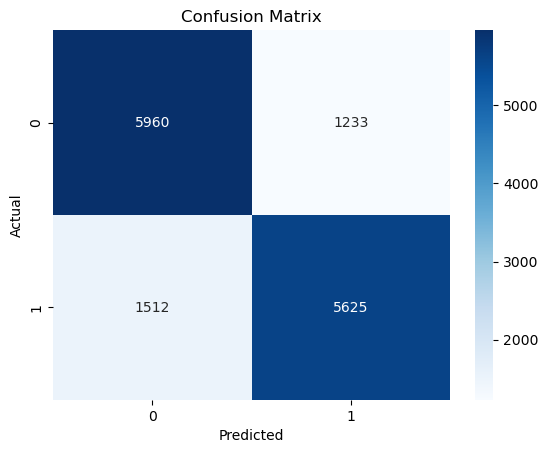

In [26]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
# Predict on test dataset
test_predictions = model.predict(X_test_scaled)

# Save predictions
test_df["readmitted"] = test_predictions
test_df.to_csv("test_predictions.csv", index=False)

print("Predictions saved successfully!")

Predictions saved successfully!


In [28]:
test = pd.read_csv('test_predictions.csv')
test

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,x19,x20,x21,x22,x23,x24,x25,change,diabetesmed,readmitted
0,11128,46325466,3928383,Caucasian,Female,[70-80),[75-100),3,InternalMedicine,45,...,No,No,No,No,No,No,No,No,Yes,0
1,79758,245219616,60926103,Caucasian,Male,[60-70),[75-100),2,InternalMedicine,10,...,No,No,No,No,No,No,No,No,Yes,0
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),[75-100),11,InternalMedicine,41,...,No,Steady,No,No,No,No,No,No,Yes,0
3,64504,179491944,86935374,Caucasian,Female,[70-80),[75-100),1,InternalMedicine,71,...,No,No,No,No,No,No,No,No,No,0
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),[75-100),7,InternalMedicine,59,...,No,Steady,No,No,No,No,No,Ch,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16642,69643,198316824,71780013,Caucasian,Male,[70-80),[75-100),3,Surgery-Vascular,51,...,No,Down,No,No,No,No,No,Ch,Yes,1
16643,29787,96993108,23318685,Caucasian,Male,[70-80),[75-100),2,InternalMedicine,37,...,No,No,No,No,No,No,No,Ch,Yes,1
16644,44710,137896878,90856791,Caucasian,Female,[50-60),[75-100),2,Family/GeneralPractice,14,...,No,No,No,No,No,No,No,No,No,1
16645,28486,93395658,3233259,Caucasian,Male,[70-80),[75-100),1,InternalMedicine,35,...,No,No,No,No,No,No,No,No,Yes,0
